<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Competency_assessment_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

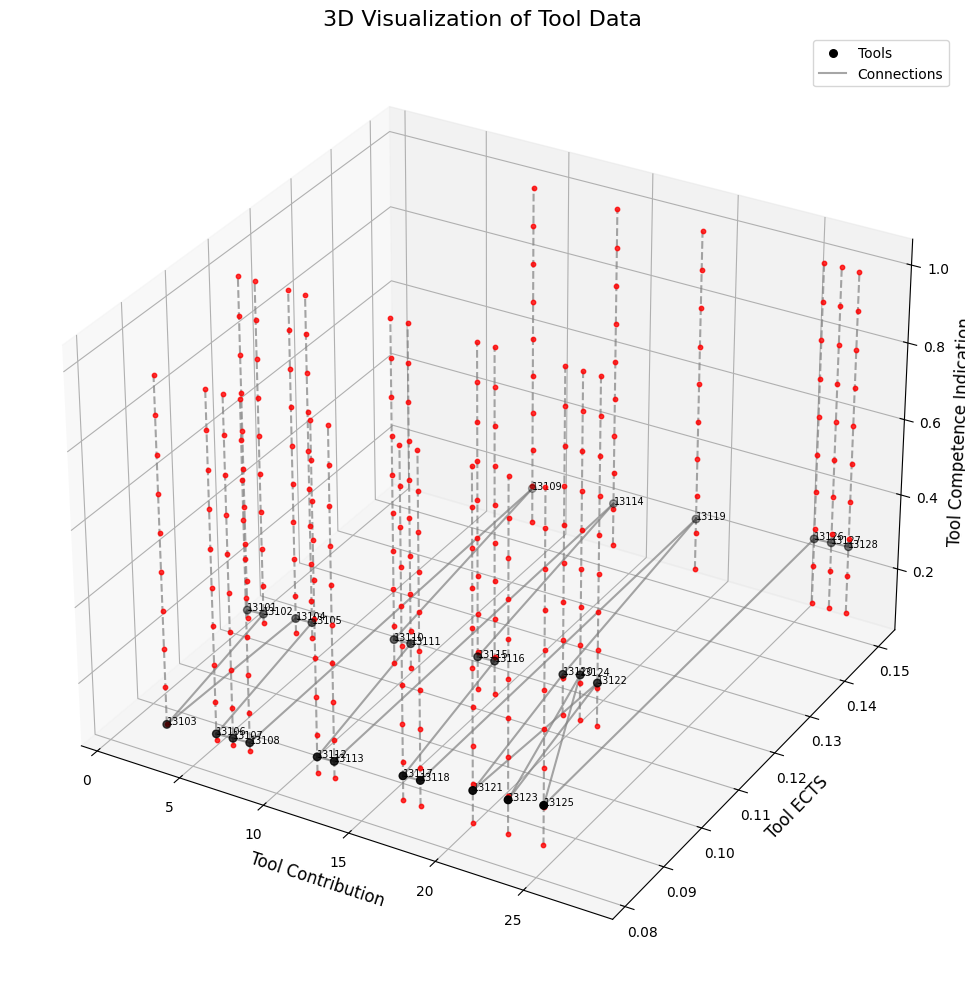

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from Excel
input_file = '/content/output 7-12-2023.xlsx'  # Path to the input Excel file
df = pd.read_excel(input_file)

# Extract columns for visualization
tool_codes = df['Tool_code']
tool_contributions = df['Tool_contribution']
tool_ects = df['Tool_ECTS']
tool_competence = df['Tool_competence_indication']

# Set threshold
threshold = 0.1

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of points for each tool
ax.scatter(tool_contributions, tool_ects, tool_competence, c='black', s=30, label='Tools', depthshade=True)

    # Annotate points with Tool_code (moved outside the loop)
for i in range(len(tool_codes)):
        ax.text(tool_contributions[i], tool_ects[i], tool_competence[i],
                f'{tool_codes[i]}', fontsize=7, color='black')

# Add vertical lines for each tool, showing the assessment distribution
for i in range(len(tool_codes)):
    x = tool_contributions[i]
    y = tool_ects[i]
    z_start = 0.1
    z_end = 1.0

    # Vertical line for assessment distribution
    ax.plot([x, x], [y, y], [z_start, z_end], color='gray', linestyle='--', alpha=0.7)

    # Highlight points on vertical line for threshold steps
    assessment_steps = np.arange(z_start, z_end + threshold, threshold)
    for z in assessment_steps:
        ax.scatter([x], [y], [z], c='red', s=10, alpha=0.8)

# Connecting lines between points
for i in range(len(tool_codes) - 1):
    x_line = [tool_contributions[i], tool_contributions[i + 1]]
    y_line = [tool_ects[i], tool_ects[i + 1]]
    z_line = [tool_competence[i], tool_competence[i + 1]]
    ax.plot(x_line, y_line, z_line, color='gray', alpha=0.7, label='Connections' if i == 0 else "")



# Labels and legend
ax.set_title("3D Visualization of Tool Data", fontsize=16)
ax.set_xlabel("Tool Contribution", fontsize=12)
ax.set_ylabel("Tool ECTS", fontsize=12)
ax.set_zlabel("Tool Competence Indication", fontsize=12)
ax.legend()

# Add grid
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()
